# Dimensionality reduction by Subspace projections

Lets assume that there is a random design matrix, $X$, whose dimensions are $n\times p$, where $n$ is the number of samples and $p$ is the number of features.

The dimensionality of every sample is the number of features, $p$.

Dimensionality reductions means transforming the data from a high dimensional ($p$) representation to the lower dimensional representation ($'$), still retaining usefull properties of the original data. When dimensionality reduction is applied to matrix $X_{n\times p}$ the resulting reduced matrix,  $X_{n\times p'}$  will have as many samples as the original matrix, but the number of features is reduced.

These goals can be met, if the projection method is first fitted to the data, so that the axis of new $p'$ dimensional space are aligned optimally to the data.

## Principal Component Analysis (PCA)

PCA is one of the most well known dimensionality reduction methods. It transforms the set of observations with possibly correlated variables (=features) into a set of values of linearly uncorrelated variables, called principal components.

PCA transformation is defined in such a way that the first principal component has the largest possible variance and the rest of the components are ordered according to their variances in descending order.

PCA can be used as a dimensionality reduction method by removing some of the least important variables, and keeping the first most important.

This is very convenient, since the variables in high-dimensional problems are often correlated. The high dimensionality and co-variance between the features makes many statistical methods inapplicable. Eliminating the covariance and reducing the dimensionality makes many methods working better.

PCA was invented in 1901 by Karl Pearson, as an analogue of
the principal axis theorem in mechanics; it was later
independently developed (and named) by Harold Hotelling in
the 1930s.Depending on the field of application, it is also named thediscrete Karhunen Loeve transform (KLT) in signal processing,
the Hotelling transform in multivariate quality control, singular
value decomposition (SVD), and eigenvalue decomposition
(EVD).

Mathematically PCA projection works like this:
$$
    Y_{n\times p'} = X_{n\times p} ~ E_{p\times p'},
$$

where $n$ is number of samples, $p$ is number of variables (or features), $p'$ is possibly reduced number of features, $X$ is the design matrix, input to PCA, $E$ is matrix of eigenvectors, $Y$ is a matrix of principal components, projections. 

The most important component of $Y$ is the first column, and the rest of them carry less information in decreasing order. Dimensionality reduction is achieved by simply discarding the rightmost columns of $Y$. 

Original data can be reconstructed as follows:
$$
    X_{n\times p} = Y_{n\times p'} ~ E_{p'\times p},
$$

Eigenvalues and eigenvectors can be calculated for example using Singular Value Decomposition (SVD)
$$
   X = USV^T,
$$
where S is the diagonal matrix of singular values (eigenvalues) $s_i$ and columns of V are principal directions/axis (or eigenvectors).


See references [1-4](#references)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()  

In [62]:
k=0.1
N=100
x1=np.random.rand(N)
x2=k*np.random.rand(100)+(1-k)*x1
x2=k*np.random.normal(0,0.5,size=N)+(1-k)*x1
X=np.vstack((x1,x2)).T
m=np.sqrt(x1**2+x2**2)

def plotData(X, ax=None, xlab=None, ylab=None, title=None, noline=False, fs=True):
    if ax==None:
        ax=plt.gca()
    ax.scatter(X[:,0], X[:,1], c=m, cmap='rainbow')

    minx=X.min()
    maxx=X.max()
    if not noline:
        C=np.cov(X.T)
        x=np.linspace(minx, maxx, 10)
        k=C[1,1]/C[0,0]
        k2=-1/k
        y=k*x
        middle=(minx+maxx)/2
        length=(maxx-minx)*0.1
        x2=np.linspace(middle,middle+length,10)
        y2=k2*x2+(k*middle - k2*middle)
        ax.plot(x,y,'r')
        ax.plot(x2,y2,'r')

    if fs:
        ax.axis([minx, maxx, minx, maxx])
    else:
        ax.axis([X[:,0].min(), X[:,0].max(),
                 X[:,1].min(), X[:,1].max()])
        
    if title:
        ax.set_title(title)
    if xlab:
        ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)
    

## Projecting linear data

Visualize the data first. Plot the points in the 2D dataset as scatter plot, using the magnitude of values ($\sqrt{x_1^2 + x_2^2}$) as color index. Big values will be plotted as red, and small values as blue.

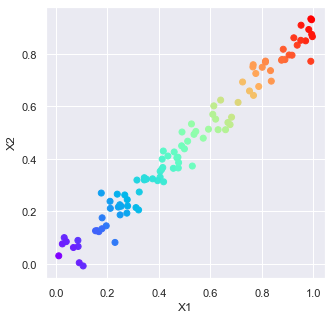

In [63]:
m=np.sqrt(X[:,0]**2+X[:,1]**2)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=m, cmap='rainbow')
plt.xlabel('X1');plt.ylabel('X2');

### Calculate new coordinates with maximum variance

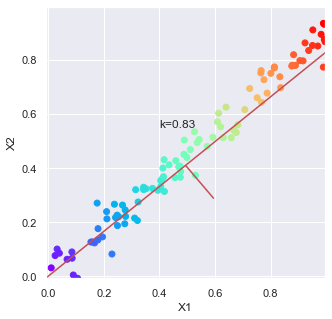

In [64]:
# Calculate the angle of maximum variance using the variances
# of variables, and calculate the reciprocal, k
var=X.var(axis=0)
k=var[1]/var[0]

# Plot the data and the direction of maximum variance, and the 
# orthogonal direction
plt.figure(figsize=(5,5))
plotData(X, xlab='X1', ylab='X2');
plt.text(0.4, 0.55, "k=%4.2f" % (k));

### Scale the data and plot it again

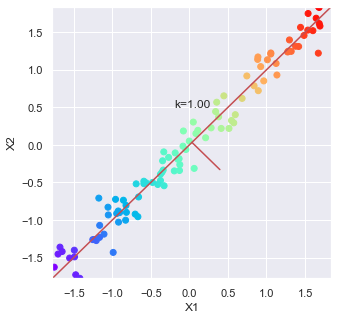

In [65]:
from sklearn.preprocessing import scale
plt.figure(figsize=(5,5))
Xs=scale(X)
plotData(Xs, xlab='X1', ylab='X2')
var=Xs.var(axis=0); k=var[1]/var[0]; plt.text(-0.2, 0.5, "k=%4.2f" % (k));

### Plot the data along these new axis by rotating the data with Affine transformation

$$
Xr = R \times X =
\begin{bmatrix}
\cos(\phi) & \sin(\phi) & 0 \\
-\sin(\phi) & \cos(\phi) & 0 \\
0 & 0 & 1
\end{bmatrix} \times X,
$$
where $\phi$ is the rotation angle. 

The tangent of the rotation angle can be calculated by using variances of X along both axes:
$
   \tan(\phi) = \frac{\rm{var}(X_2)}{\rm{var}(X_1)}
$

In [66]:
var=Xs.var(axis=0)
k=var[1]/var[0]

cost=var[0]/np.sqrt(var[0]**2 + var[1]**2) # Cosine of the rotation angle
sint=var[1]/np.sqrt(var[0]**2 + var[1]**2) # Sinus of the rotation angle
R=np.array([
    [cost, sint, 0], 
    [-sint, cost, 0],
    [0, 0, 1]])
X3d=np.vstack((Xs.T,np.ones(N))).T
Xr = (R @ X3d.T).T


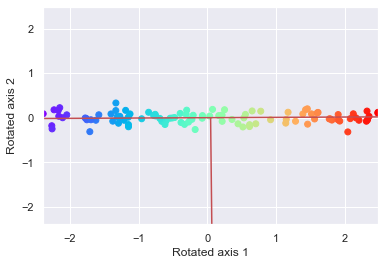

In [67]:
plotData(Xr, xlab='Rotated axis 1', ylab='Rotated axis 2')

## PCA: How to do all previously shown steps for you

array([0.99271432, 0.00728568])

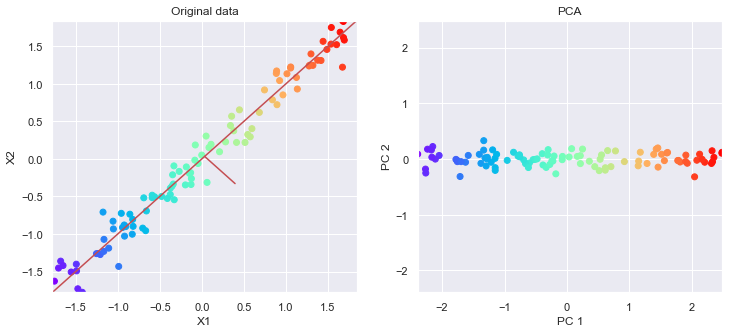

In [68]:
from sklearn.decomposition import PCA

# Perform PCA decomposition
pca=PCA(n_components=2)
Xp=pca.fit_transform(Xs)

# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1, xlab='X1', ylab='X2', title='Original data')
plotData(Xp, ax2, xlab='PC 1', ylab='PC 2', title='PCA', noline=True)
pca.explained_variance_ratio_

### PCA is based on singular value decomposition

Singular alue decomposition, decomposes matrix X into three components

`U,S,E = svd(X)`

S is the eigenvalues of X and E contains the eigenvectors of X. The rotation of the data along coordinates with maximum variance is taken care by simply matrix multiplication:

$$
    X_r = X \times E
$$


In [69]:
from numpy.linalg import svd
U,S,E=svd(Xs)
print(E)
print("Equals")
print(pca.components_)
Xr=Xs @ pca.components_


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Equals
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


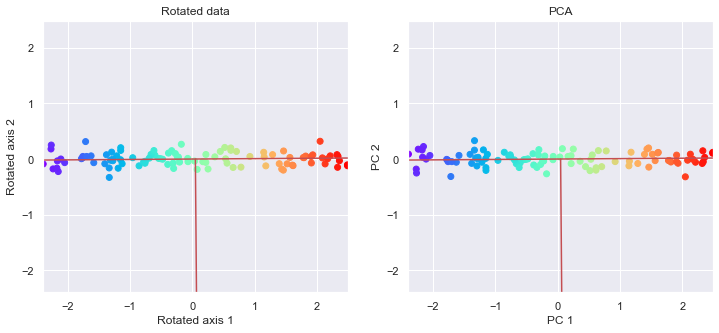

In [70]:
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xr[:,[1,0]], ax1, xlab='Rotated axis 1', ylab='Rotated axis 2', title='Rotated data')
plotData(Xp, ax2,  xlab='PC 1', ylab='PC 2', title='PCA')

### Reconstruct data

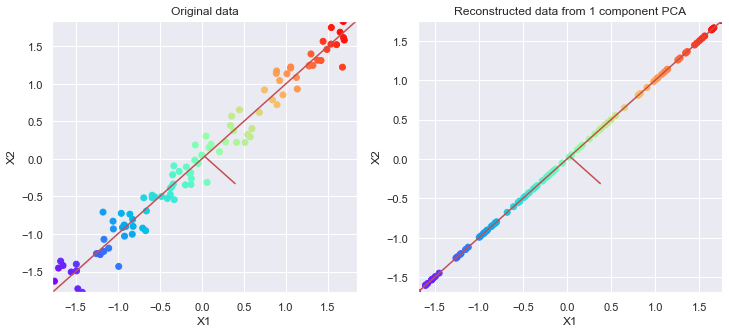

In [71]:
pca=PCA(n_components=1)
Xp=pca.fit_transform(Xs)
Xreconstructed=pca.inverse_transform(Xp)
# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1, xlab='X1', ylab='X2', title='Original data')
plotData(Xreconstructed, ax2, xlab='X1', ylab='X2', title='Reconstructed data from 1 component PCA')

## Non-Linear data

In [72]:
k=0.1
N=100
x1=np.random.rand(N)
x2=k*np.random.rand(100)+(1-k)*x1
x2=k*np.random.normal(0,0.5,size=N)+(1-k)*x1**2
Xnl=np.vstack((x1,x2)).T


<Figure size 360x360 with 0 Axes>

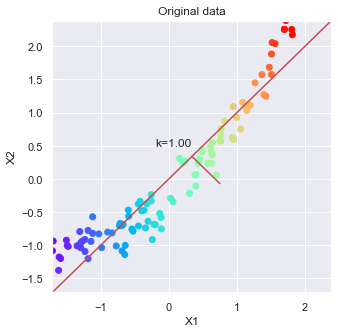

In [73]:
m=np.sqrt(Xnl[:,0]**2+Xnl[:,1]**2)
plt.figure(figsize=(5,5))

Xs=scale(Xnl)
plt.figure(figsize=(5,5))
plotData(Xs, xlab='X1', ylab='X2', title='Original data')
var=Xs.var(axis=0); k=var[1]/var[0]; plt.text(-0.2, 0.5, "k=%4.2f" % (k));

### Try PCA

array([0.97257854, 0.02742146])

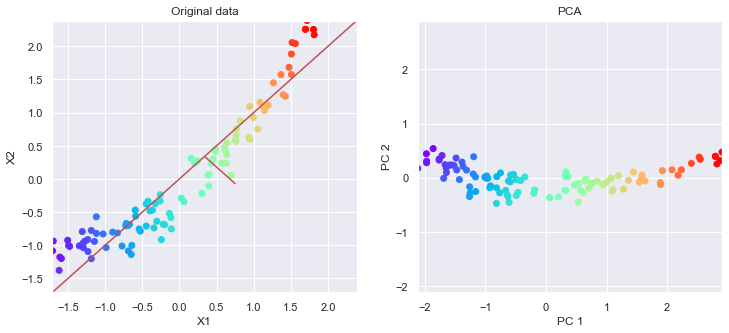

In [74]:
# Perform PCA decomposition
pca=PCA(n_components=2)
Xp=pca.fit_transform(Xs)

# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1,xlab='X1', ylab='X2', title='Original data')
plotData(Xp, ax2,xlab='PC 1', ylab='PC 2', title='PCA', noline=True)
pca.explained_variance_ratio_

## Manifold learning

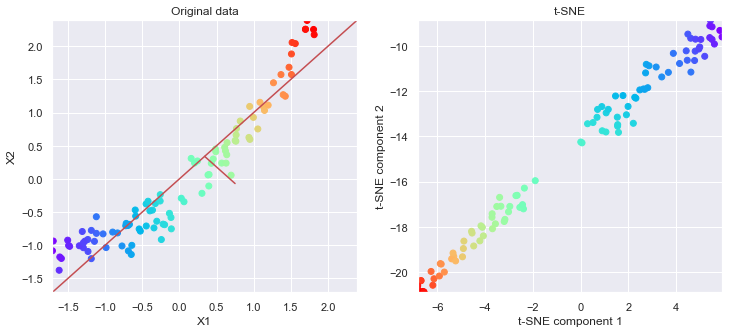

In [82]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
Xp=tsne.fit_transform(Xs)


# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1, xlab='X1', ylab='X2', title='Original data')
plotData(Xp, ax2, xlab='t-SNE component 1', ylab='t-SNE component 2', title='t-SNE', noline=True, fs=False)

## More non-linear data

In [83]:
k=0.1
N=100
x1=np.random.rand(N)
x2=k*np.random.rand(100)+(1-k)*x1
x2=k*np.random.normal(0,0.5,size=N)+(1-k)*np.sin(3*x1)
Xnl=np.vstack((x1,x2)).T


<Figure size 360x360 with 0 Axes>

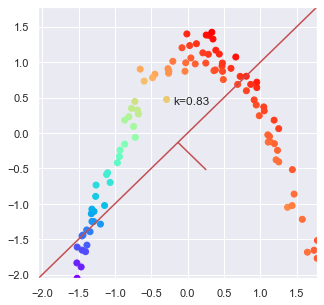

In [84]:
m=np.sqrt(Xnl[:,0]**2+Xnl[:,1]**2)
plt.figure(figsize=(5,5))

Xs=scale(Xnl)
plt.figure(figsize=(5,5))
plotData(Xs)
var=X.var(axis=0); k=var[1]/var[0]; plt.text(-0.2, 0.4, "k=%4.2f" % (k));

### PCA can not reduce dimensionality

array([0.65244585, 0.34755415])

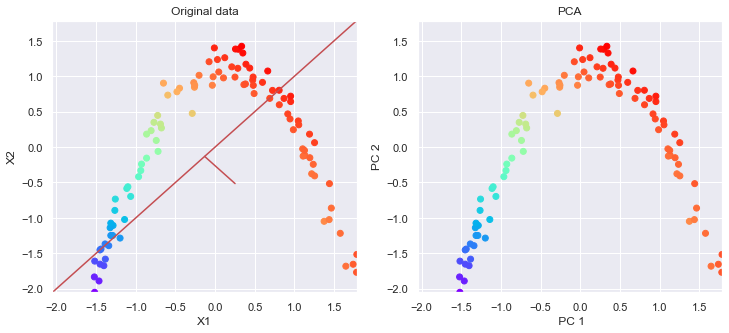

In [86]:
# Perform PCA decomposition
pca=PCA(n_components=2)
Xp=pca.fit_transform(Xs)

# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1,xlab='X1', ylab='X2', title='Original data')
plotData(Xs, ax2,xlab=' PC 1', ylab='PC 2', title='PCA', noline=True)
pca.explained_variance_ratio_

### Aply t-SNE

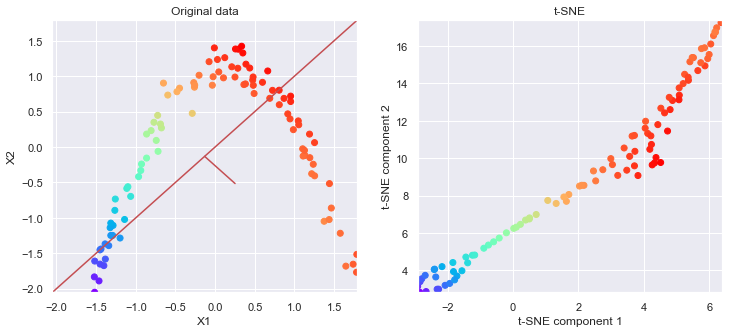

In [88]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
Xp=tsne.fit_transform(Xs)


# Plot the original data and transformed data side by side
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plotData(Xs, ax1, xlab='X1', ylab='X2', title='Original data')
plotData(Xp, ax2, xlab='t-SNE component 1', ylab='t-SNE component 2', title='t-SNE', noline=True, fs=False)

## Application to handwritten digit recognition

The handwriting recognition dataset contains 1797 digitized hand written written characters. The characters are digitized using 8x8 grid, so each sample is represented by 64 parameters. Each parameter can have a value from 0 to 15.

- The original data is 64 dimensional, so it is difficult to visualize.


In [90]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


### Print some of the numbers in the database

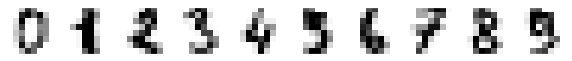

In [93]:
# Plot the first samples of each number

# First create a array of 10 subplots in one row
fig,axn=plt.subplots(nrows=1, ncols=10, figsize=(10,2))

# Select one example of each character and plot them in separate subplot
for i in range(10):
    # Select one subplot. axn can contain a two-dimensional array
    # of subplots. flatten() shrinks the structure 
    ax=axn.flatten()[i]
    
    # Plot the data as an 8x8 array, using grey colormap
    ax.imshow(digits.data[i,:].reshape((8,8)), cmap='Greys')
    
    # Disable the numbers in x- and y-axes by setting them as empty lists
    ax.set_xticks([])
    ax.set_yticks([])



### Dimensionality reduction using PCA

Apply PCA to the data, keeping at first up to 32 dimensions to study how much variance is explained by each principal component.

(1797, 64)
(1797, 32)


Text(0, 0.5, 'The variance explained / %')

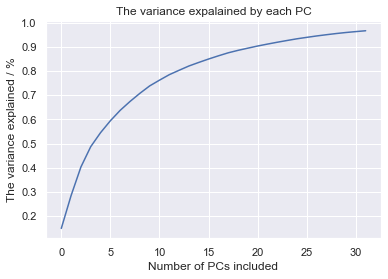

In [114]:
pca = PCA(32)  # project from 64 to 32 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('The variance expalained by each PC')
plt.xlabel('Number of PCs included')
plt.ylabel('The variance explained / %')

It looks like quite many dimesions are needed, to keep the information in the dataset, but let's try to plot it in 2D anyhow.

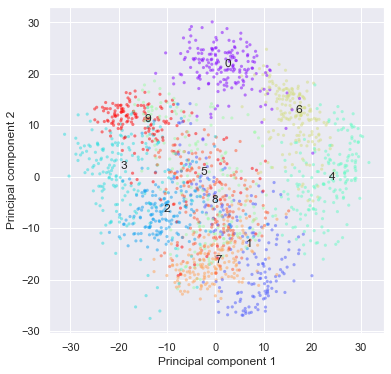

In [111]:
plt.figure(figsize=(6,6))
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, 
    edgecolor='none', alpha=0.5, cmap='rainbow', s=10)
plt.xlabel('Principal component 1'); plt.ylabel('Principal component 2')

for i in range(10):
    j=(digits.target==i)
    x,y=np.median(projected[j,:2], axis=0)
    plt.text(x,y, "%d" % (i))

The result is not retaining enough information to be able to recognize characters any longer. Let's try if nonlinear methods would work. How about Isomap.

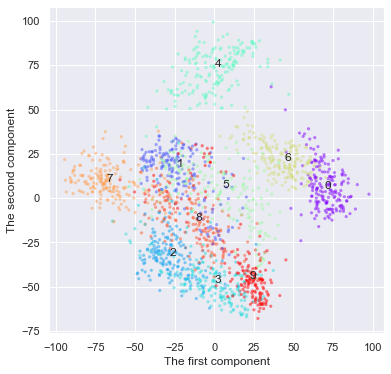

In [112]:
from sklearn.manifold import Isomap
isomap=Isomap(n_components=2, n_neighbors=30)
Y=isomap.fit_transform(digits.data)

plt.figure(figsize=(6,6))
plt.scatter(Y[:,0], Y[:,1], c=digits.target, edgecolor='none', alpha=0.5, cmap='rainbow', s=10)
plt.xlabel('The first component'); plt.ylabel('The second component')

for i in range(10):
    j=(digits.target==i)
    x,y=np.median(Y[j,:], axis=0)
    plt.text(x,y, "%d" % (i))

Better, but not enough yet. How about t-SNE?

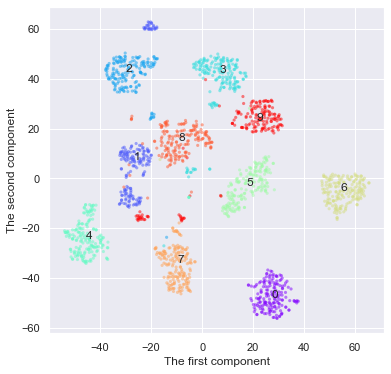

In [113]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
Y=tsne.fit_transform(digits.data)

plt.figure(figsize=(6,6))
plt.scatter(Y[:,0], Y[:,1], c=digits.target, edgecolor='none', alpha=0.5, cmap='rainbow', s=10)
plt.xlabel('The first component'); plt.ylabel('The second component')

for i in range(10):
    j=(digits.target==i)
    x,y=np.median(Y[j,:], axis=0)
    plt.text(x,y, "%d" % (i))

### Handwritten digits case
- Linear methods were not succesfull retaining enough information for handwritten digits recognition when the dimensionality of data was reduced from 64 to 2. The explained variance ratio inferes that quite many principal components, like more than 10 would be needed for this problem.
- Isomap was able to capture better the structure of the originally multidimensional data only in 2D, but it was still already loosing plenty of important information. At least couple of more components would be needed. Probably it would be rather simple to implement a character recognition method in 4D space for example.
- t-SNE was the best at this time. It looks like it would be quite straightformad to implement a method for handwriting recognition using only two dimensions.
- The non-linear methods were clearly slower than PCA
- PCA is more simple to understand

## Conclusion

- PCA is a powerfull method for transforming data into low dimensional subspace
- PCA learns linear dependences between variables (correlation) and removes it, so that projected variables are uncorrelated
- PCA transformation can be reversed, and the transformed data converted back to the original domain 
- If dependencies between variables is non-linear, then PCA cannot model it efficiently, and more components are needed
- Manifold learning methods, such as Multi-Dimensinal Scaling (MDS), Isomap, Locally Linear Embedding (LLE) and t-distributed Stochastic Neighborhood Embedding (t-SNE) can learn also non-linear dependencies producing lower dimensional subspace for presenting data
- All of these methods try to keep the neighborhood information. Those samples which were close to each other are also close after projection. In these samples blue dots stays together and the order between samples is also kept.




References

    I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. Ii: Real Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 22, no. 1, pp. 21–31, 1973, doi: 10.2307/2346300.
    Q. Guo, W. Wu, D. L. Massart, C. Boucon, and S. de Jong, “Feature selection in principal component analysis of analytical data,” Chemometrics and Intelligent Laboratory Systems, vol. 61, no. 1, pp. 123–132, Feb. 2002, doi: 10.1016/S0169-7439(01)00203-9.
    I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. I: Artificial Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 21, no. 2, pp. 160–173, 1972, doi: 10.2307/2346488.
    C. M. Bishop, “Pattern recognition and machine learning,” CERN Document Server, 2006. https://cds.cern.ch/record/998831 (accessed Oct. 02, 2020).

